# Final project

- Importing modules:

In [1]:
# Making the imports for modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load the iris data from sklearn
from sklearn.datasets import load_iris

#loading the modules for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from math import exp
from sklearn import preprocessing

#Import the required modules for PCA.
import numpy as np
from numpy import linalg as LA

# Question1: Linear regression using gradient descent

In this linear regression, I have used 0.01 as alpha and reduce the number of iterations to speed up the run for the algorithm 

In [2]:
# Preprocessing Input data
data = pd.read_csv('C:/Users/mayur/Documents/UNCC/Machine_learning/linear_regression_test_data.csv')

#Storing each column variable into a new variable X and Y
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

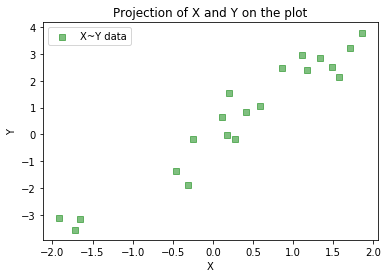

In [3]:
#projecting the plot to view the data points
plt.scatter(X, Y, marker= 's',color= 'green',alpha=0.5)
plt.legend(['X~Y data'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Projection of X and Y on the plot")
plt.show()


In [4]:
#Building the model for linear regression using gradient descent
#set the slope and intercept as '0' at initial point
m = 0
c = 0

L = 0.01  # The learning Rate/alpha
iteration = 1000  # The number of iterations to perform gradient descent

#taking the X variable 
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(iteration): 
    # the formula Y = mX + c
    Y_pred = m*X + c  # The current predicted value of Y
    
    #calculating the partial derivative for m and c
    #Using the formulas of linear regressions
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    
    #Updating the m and c values from '0' to a final one
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print("The Coefficient is:", m )
print("The Intercept is:", c)

The Coefficient is: 1.9340058310587325
The Intercept is: 0.0245251134854721


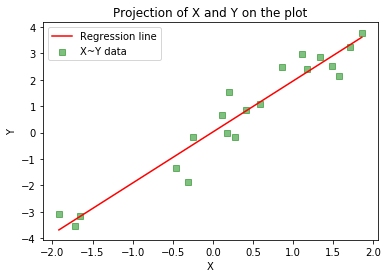

In [5]:
# Making predictions
Y_pred = m*X + c

#plotting the scatter plot with regression line to show the correlation
plt.scatter(X, Y, marker= 's',color= 'green',alpha=0.5)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)],'y-', color='red') # predicted
plt.legend(['Regression line','X~Y data'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Projection of X and Y on the plot")
plt.show()

# Question2: Logistic regression using gradient descent

In this regression, I am using he iris dataset for writing and debugging the code

In [ ]:
# Logistic Regression is generally used for classification purposes.
#If we take the weighted sum of inputs as the output as we do in Linear Regression, 
#the value can be more than 1 but we want a value between 0 and 1.

- Loading the Iris data:

In [6]:
# loading the dataset Iris data from sklearn
iris_data = load_iris()

setosa_versicolor = iris_data.data[0:100,0:4]
setosa_versicolor_targets = iris_data.target[0:100]

versicolor_virginica = iris_data.data[50:150,0:4]
versicolor_virginica_targets = iris_data.target[50:150]

#X- being the features of setosa and virginica
setosa_virginica = np.concatenate((iris_data.data[0:50,0:4], iris_data.data[100:150,0:4]), axis=0)
#Y- being the target/label of setosa and virginica
setosa_virginica_targets = np.concatenate((iris_data.target[0:50], iris_data.target[100:150]), axis=0)


Text(0.5, 1.0, 'Iris species-Setosa and Virginica')

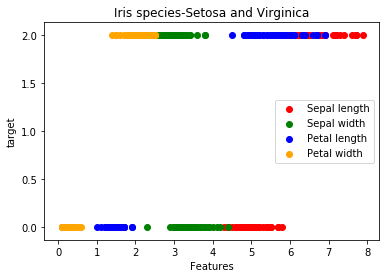

In [7]:
#This plot is just showing one dimension projection of setosa and virginica for all the four features
#Just for reference
plt.scatter(setosa_virginica[:,0], setosa_virginica_targets, color = 'red', label='Sepal length')
plt.scatter(setosa_virginica[:,1], setosa_virginica_targets, color = 'green', label='Sepal width')
plt.scatter(setosa_virginica[:,2], setosa_virginica_targets, color = 'blue', label='Petal length')
plt.scatter(setosa_virginica[:,3], setosa_virginica_targets, color = 'orange', label='Petal width')
plt.legend()
plt.xlabel('Features')
plt.ylabel('target')
plt.title('Iris species-Setosa and Virginica')

- Training the dataset iris:

In [8]:
#Here, we are training the dataset by fixing the seed with test siz of 20% and train size of 80%
X_train, X_test, y_train, y_test = train_test_split(setosa_virginica,setosa_virginica_targets, test_size=0.2,random_state=123)


In [9]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate output variable (y) with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) #derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  #derivative w.r.t bias
            
           
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        return self.weights, self.bias
            

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [2 if i >= 0.5 else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    


In [10]:
from sklearn import datasets
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [11]:
regressor = LogisticRegression(learning_rate=0.1, n_iters=1000)
weights, bias = regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))


print("The coefficient/slope is:", weights)
print("The intercept is:", bias)

LR classification accuracy: 0.55
The coefficient/slope is: [ 65.82534377 -32.31682435 198.55990355  86.18280116]
The intercept is: -2.4431638763111296


# Question3: PCA and linear regression

In [12]:
#Loading the CSV file into pandas dataframe
data2 = pd.read_csv('C:/Users/mayur/Documents/UNCC/Machine_learning/linear_regression_test_data.csv')

In [13]:
# parent class is defined as PCA and linear regression.
class PCA_LR:    
    
    #constructor which takes number of components.
    def __init__(self, num_of_components):        
        self.num_of_components = num_of_components 
        self.pca_results = None
        
    #A method/function is built within the class which takes in dataset X, correlation logic as boolean.
    def fit_transform(self, data, corr_logic= False): 
        
        #from the data picking up two variables x and y
        dt_points = data[['x','y']]
        #These variables are assigned into X and Y 
        X = dt_points.iloc[:,0]
        Y = dt_points.iloc[:,1]
        
        #calculating the mean centering
        column_mean = dt_points.mean(axis=0) 
        #stack the data
        column_mean_stacked = np.tile(column_mean, reps=(dt_points.shape[0], 1)) 
        #substract the each individual mean value to the dataset mean value
        x_mean_centered = dt_points - column_mean_stacked   
        
        # use mean_centered data or standardized mean_centered data        
        if not corr_logic:            
            data_for_pca = x_mean_centered        
        else:   
            #if there is correlation then calculate the standard deviation
            column_sd = np.std(dt_points, axis=0)            
            column_sd_stacked = np.tile(column_sd, reps=(dt_points.shape[0], 1))            
            data_for_pca = dt_points / column_sd_stacked
             
        # get covariance matrix of the data        
        covariance_matrix = np.cov(data_for_pca, rowvar=False)    
            
        # eigendecomposition of the covariance matrix        
        w, v = LA.eig(covariance_matrix)        
        w = w.real        
        v = v.real  
            
        # sort eigenvalues in descending order        
        II = w.argsort()[::-1]        
        all_eigenvalues = w[II]        
        all_eigenvectors = v[:, II]    
            
        # get percent variance        
        percent_variance_explained = all_eigenvalues / sum(all_eigenvalues) * 100    
            
        # get scores        
        pca_scores = np.matmul(data_for_pca, all_eigenvectors)  
            
        # collect PCA results        
        self.pca_results = {'data': dt_points,
                       'mean_centered_data': x_mean_centered,
                       'percent_variance_explained': percent_variance_explained,
                       'loadings': all_eigenvectors,
                       'scores': pca_scores, 'data_after_pretreatment': data_for_pca}
        
        
    def linear_reg(self):
        
        # Building the model for linear regression using gradient descent
        #set the slope and intercept as '0' at initial point
        m = 0
        c = 0

        L = 0.1  # The learning Rate
        iteration = 1000  # The number of iterations to perform gradient descent

        #taking the X variable 
        n = float(len(X)) # Number of elements in X

        # Performing Gradient Descent 
        for i in range(iteration): 
                # the formula Y = mX + c
                Y_pred = m*X + c  # The current predicted value of Y
    
               #calculating the partial derivative for m and c
               #Using the formulas of linear regressions
                D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
                D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    
                #Updating the m and c values from '0' to a final one
                m = m - L * D_m  # Update m
                c = c - L * D_c  # Update c
    
        
        # Making predictions
        Y_pred = m*X + c


        #plotting the PCA and linear regression together
        fig, ax = plt.subplots()            
        ax.scatter(self.pca_results['data'].iloc[:,0], self.pca_results['data'].iloc[:,1], color='red')# x and y
        ax.scatter(data.iloc[:,0], data.iloc[:,2], color='blue') # y-theoretical vs x
        ax.plot([0, 4*self.pca_results['loadings'][0, 0]], [0, 4*self.pca_results['loadings'][1, 0]],color='green', linewidth=3)#PC1 axis
        plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='brown') # predicted
        plt.legend(['PC1 axis','Regression line','y vs x','y-theoretical vs x'], loc='best', fontsize=10)
        ax.set_title('PCA and Linear regression')            
        ax.set_xlabel('x')            
        ax.set_ylabel('y')            
        fig.show()   
        
       

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


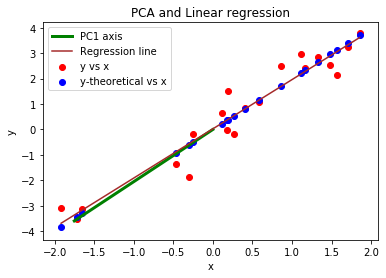

In [14]:
#instantiate of the parent class d_PCA.
pca_data = PCA_LR(2)
# access the instance attributes
pca_data.fit_transform(data2)
pca_data.linear_reg()

- Compare the PC1 axis and regression line obtained above: they both are very similar because PC1 is clearly a linear combination of the two original variables and regression line also shows the correlation between two variables.

# 4. (40 points)

# Using SKLEARN:

In [15]:
#Loading the heart disease dataset from the URL.
#setting the column names to each variables
pd.set_option('display.max_rows', None)
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',sep = ',',header=None)
heart_data.columns = ["age", "sex", "chestpain","restBP","chol","fbs","restecg","maxHR","exang","oldpeak","slope","ca","thal","hrtdisease"]

#Manipulating the data that contain unsed values
heart_data = heart_data.replace('?',0.0)
heart_data.head()

,age,sex,chestpain,restBP,chol,fbs,restecg,maxHR,exang,oldpeak,slope,ca,thal,hrtdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
#the last column for unique values for presence/absence of disease is the target for this dataset
np.unique(heart_data.hrtdisease)

array([0, 1, 2, 3, 4], dtype=int64)

PCA:

In [17]:
#Modules required for PCA from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
#X is set for all the features 0 to 13
X = heart_data.iloc[:,0:13].values
# Y is set for all the labels
Y = heart_data.iloc[:,13].values
#this is to check the dimensions of rows and columns
X.shape, Y.shape

((303, 13), (303,))

In [19]:
#standardscaler stored into a variable
scaler = StandardScaler()

#Standardizing the features using fit transform
X_scaled = scaler.fit_transform(heart_data)

#assigning the PCA to 2 dimensional
pca = PCA(n_components=2)

#applying the pca to scaled dataset and transformed into two dimensional
pca.fit(X_scaled)
principalComponents = pca.fit_transform(X_scaled)

#shape helps to view the data dimensions reduction from original dimension
X_scaled.shape, principalComponents.shape

((303, 14), (303, 2))

Text(0.5, 1.0, 'PCA-Score plot')

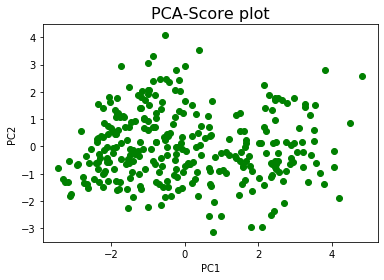

In [20]:
#plotting the scatter plot to view data in 2D.
plt.scatter(principalComponents[:,0],principalComponents[:,1],c ='green') #plotting the data of both components
# labelling the axes and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA-Score plot", fontsize = 16) #fontsize of title

- The prinicipal components are plot in the above figure for all the variables/columns

Linear regression:

- When you apply linear regression, look for variables that are strongly correlated.

In [21]:
#Modules required for linear regression
from sklearn.linear_model import LinearRegression
import seaborn as sns

Text(0.5, 1, 'Correlation matrix')

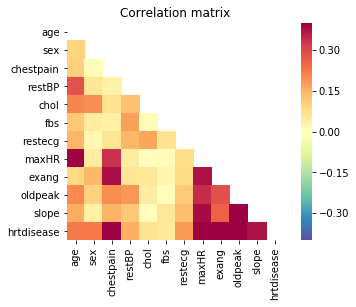

In [22]:
#In this code, I am looking for variables that are strongly correlated with each other
cor_matrix = heart_data.corr().abs()

#Plotting a heatmap to check the association between the variables
mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor_matrix, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

- From the above heatmap, the color hue which is darker at the top of the color score means there is strong relationship between variables and lighter hue means less correlation. Based on that, The strongly correlated are: age vs maxHR, chestpain vs exang, maxHR vs exang and so on..

In [23]:
#taking age and maxHR to present the regression line
x_age = heart_data.iloc[:,0]
y_HR = heart_data.iloc[:,7]
x_age = x_age.values.reshape(-1, 1)

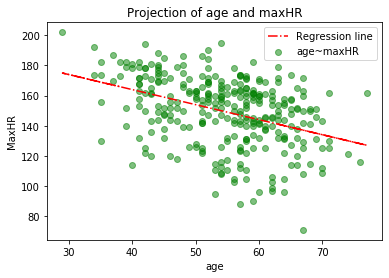

In [24]:
#performing linear regression using sklearn
model = LinearRegression()
model.fit(x_age,y_HR) # fit the age and Heart rate data
y_pred = model.predict(x_age) # make predictions using age

#the scatter plot shows the projection of the raw data for age and heart rate along with regression line
plt.scatter(x_age, y_HR, marker= 'o',color= 'green',alpha=0.5)
plt.plot(x_age,y_pred,'-.', color='red') # predicted
plt.legend(['Regression line','age~maxHR'])
plt.xlabel('age')
plt.ylabel('MaxHR')
plt.title("Projection of age and maxHR")
plt.show()

- The plot shows that there is negative correlation between age and heart rate. As age increases, heart rate decreases.

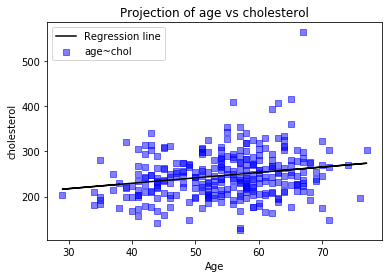

In [25]:
#storing  X and y as age and cholesterol
x1 = heart_data.iloc[:,0]
y1 = heart_data.iloc[:,4]
x1 = x1.values.reshape(-1, 1) # reshape the x to new array

#model the linear regression using sklearn
model = LinearRegression()
model.fit(x1,y1) #fit the data using x and y variables
y_pred = model.predict(x1) # prediction is done for x data


#The plot shows the regression line projection onto the data age and cholesterol.
plt.scatter(x1, y1, marker= 's',color= 'blue',alpha=0.5)
plt.plot(x1,y_pred, color ='black') # predicted
plt.legend(['Regression line','age~chol'])
plt.xlabel('Age')
plt.ylabel('cholesterol')
plt.title("Projection of age vs cholesterol")
plt.show()

- The above plot shows that there is positive correlation between age and cholesterol. As age increases, cholesterol increases.

Kmeans clustering:

- This is a very basic dataset in which we used KMeans Clustering Algorithm to divide the patients on the basis whether they will suffer from heart disease or not. The patients are divided into 5 clusters on the basis whether they have heart disease or not. 0- Absence and 1,2,3,4 Means Presence.

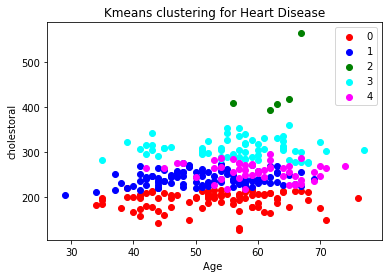

In [26]:
#Importing the required modules for kmeans clustering
from sklearn.cluster import KMeans

#taking all the variables from the dataset
x = heart_data.iloc[:,:].values

#using the kmeans to cluster the data
#I am using 5 clusters as prs/abs of heart disease are 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
#heart_data['Heart Disease'] = y_kmeans

#Plot the scatter plot using the kmeans along with presentation of the each cluster
#here, I am using age and cholesterol to show the clustering
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 4] , c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 4], c = 'blue', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 4], c = 'green', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 4], c = 'cyan', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 4], c = 'magenta', label = '4')
plt.title('Kmeans clustering for Heart Disease')
plt.xlabel('Age ')
plt.ylabel('cholestoral')
plt.legend()
plt.show()

- From the above plot, we can see that certains patients are grouped together such as 0,1,3,4, except patient 2.

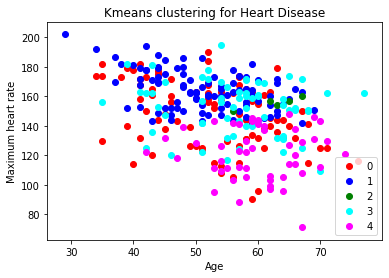

In [27]:
#The plot shows the kmeans clustering for age and heart rate
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 7] , c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 7], c = 'blue', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 7], c = 'green', label = '2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 7], c = 'cyan', label = '3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 7], c = 'magenta', label = '4')
plt.title('Kmeans clustering for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
plt.legend(loc='lower right')
plt.show()

- From the above plot of kmeans clustering all the five groups of patients are grouped together. 

Hierarchical clustering:

In [28]:
#Importing the required modules
#Using the dendrogram to find the optimal numbers of clusters. 
#First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do 
#hierarchical clustering and building dendrograms. Only import the needed tool.
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

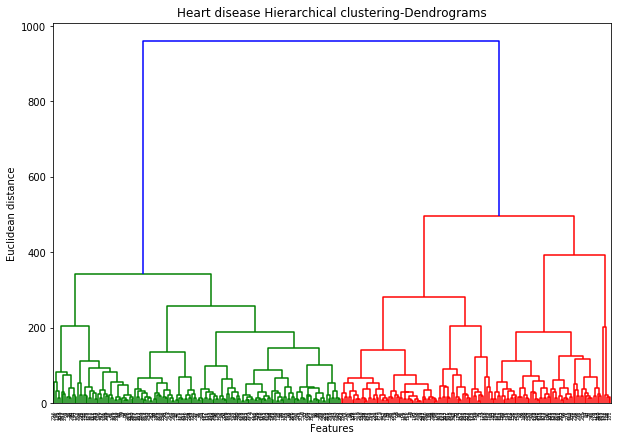

In [29]:
#for hierarchical clustering, we need a dendogram to view the number of cluster
#I used ward method to project the dendogram
plt.figure(figsize=(10, 7))  
plt.title("Heart disease Hierarchical clustering-Dendrograms")  
plt.xlabel('Features')
plt.ylabel("Euclidean distance")
dend = shc.dendrogram(shc.linkage(heart_data, method='ward'))

#Lets create a dendrogram variable linkage is actually the algorithm 
#itself of hierarchical clustering and then in linkage we have to 
#specify on which data we apply and engage. 
# Executing hierarchical clustering using two clusters taken from the image of dendogram
hier_clust_1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster = hier_clust_1.fit_predict(heart_data)


- From the above dendograms, it is clear that two clusters can be made based on the vertical line division. If I cut the dendogram at blue line, then two clusters are formed. Based on this conclusion, I use two cluster for the below plot.

Two clusters are shown in below image/plot


Text(0.5, 1.0, 'Showing clusters for age vs cholesterol')

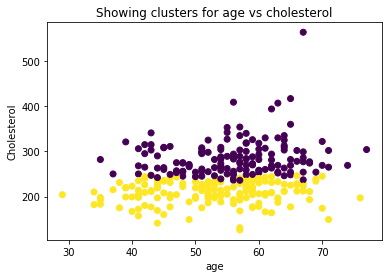

In [30]:
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster from above array output
#Let’s now visualize the two clusters:
#this plot shows the clustering for age and cholesterol
print("Two clusters are shown in below image/plot")
plt.scatter(heart_data['age'], heart_data['chol'], c=hier_clust_1.labels_) #plot for age and cholesterol
plt.xlabel("age")
plt.ylabel("Cholesterol")
plt.title("Showing clusters for age vs cholesterol")

- When you apply LDA, logistic regression, and ANN, consider the problem as a binary classification problem to distinguish presence from absence of heart disease.

LDA:

- LDA using binary classification problem to distinguish presence from absence of heart disease.

In [31]:
#load the LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
#here, we are dividing the data as X with all variables and y being prs/abs of heart disease
X = heart_data.iloc[:,0:13].values
Y = heart_data.iloc[:,13].values
Y_class = [1 if i > 0 else 0 for i in Y] # as there are 5 groups, we are dividing it into 2 by running a for loop
Y_class = np.array(Y_class) #binary classification

red dot - Disease
purple dot - No disease


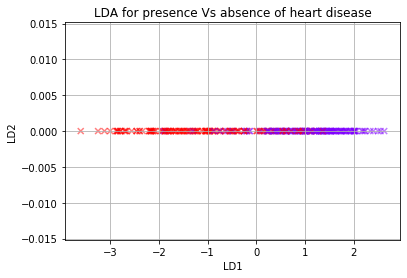

In [33]:
#Use the LDA imported from sklearn
sklearn_lda = LDA()

#dimensional reduction occur here by passing the parameter from the iris data
#using setosa and Virginica
lda_sklearn = sklearn_lda.fit(X,Y_class).transform(X)
lda_sklearn = -lda_sklearn


#Plot a scatter plot using the scores generated above 
#The plot from this shows different color for each label/target
plt.scatter(lda_sklearn,np.zeros([303]),marker= 'x',alpha=0.5,c=Y_class,cmap='rainbow')
plt.grid(True)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA for presence Vs absence of heart disease")
print("red dot - Disease\npurple dot - No disease")


Logistics Regression:

In [34]:
#Importing the modules
from sklearn.metrics import accuracy_score

In [35]:
X = heart_data.iloc[:,0:9].values
Y = heart_data.iloc[:,13].values
Y_class = [1 if i > 0 else 0 for i in Y] # as there are 5 groups, we are dividing it into 2 by running a for loop
Y_class = np.array(Y_class) #binary classification

In [38]:
#Training the data using X and Y_class from the LDA
X_train, X_test, y_train, y_test = train_test_split(X,Y_class, test_size=0.2)

Accuracy: 0.5245901639344263


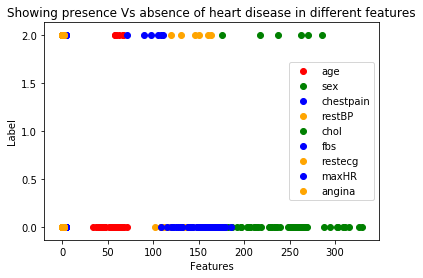

In [39]:
# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_sk = lr_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_sk))


#the plot of logistic regression is plotted for different variables together 
#plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], y_pred_sk, color="red", label='age')
plt.scatter(X_test[:,1], y_pred_sk, color = 'green', label='sex')
plt.scatter(X_test[:,2], y_pred_sk, color = 'blue', label='chestpain')
plt.scatter(X_test[:,3], y_pred_sk, color = 'orange', label='restBP')
plt.scatter(X_test[:,4], y_pred_sk, color = 'green', label='chol')
plt.scatter(X_test[:,5], y_pred_sk, color = 'blue', label='fbs')
plt.scatter(X_test[:,6], y_pred_sk, color = 'orange', label='restecg')
plt.scatter(X_test[:,7], y_pred_sk, color = 'blue', label='maxHR')
plt.scatter(X_test[:,8], y_pred_sk, color = 'orange', label='angina')
plt.legend(loc='center right')
plt.xlabel("Features")
plt.ylabel("Label")
plt.title("Showing presence Vs absence of heart disease in different features")
plt.show()


Artifical Neural Network(ANN):

In [40]:
#Importing the required modules
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [41]:
X = heart_data.iloc[:,0:13].values
Y = heart_data.iloc[:,13].values
Y_class = [1 if i > 0 else 0 for i in Y] # as there are 5 groups, we are dividing it into 2 by running a for loop
Y_class = np.array(Y_class) #binary classification

In [42]:
#Training the data using X and Y_class from the LDA
X_train, X_test, y_train, y_test = train_test_split(X,Y_class, test_size=0.2,random_state=1234)

In [43]:
#standardize the data using standardscaler form sklearn
scaler = StandardScaler()

#fit the scaler to the training feature set only
scaler.fit(X_train)

#training the test and train data using transform using scaler data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#Modeling the ANN:
#applying the hidden layer size as default 100
MLP = MLPClassifier(hidden_layer_sizes=100,max_iter=1000)

#fit the model to the standardized data
MLP.fit(X_train,y_train.ravel())

#Make the predictions
predictions = MLP.predict(X_test)

#the accuracy, confusion matrix and final report is printed below
print("The Accuracy score is:", accuracy_score(y_test,predictions))
print("The confusion matrix is:\n", confusion_matrix(y_test,predictions))
print("The Final report is:\n",classification_report(y_test,predictions))

The Accuracy score is: 0.819672131147541
The confusion matrix is:
 [[25  6]
 [ 5 25]]
The Final report is:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



- The accuracy score and f1-score are 82% which means that the trained model is accurate. That means, they are correctly classified into having and not having heart disease.